In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/hepatitis/master/data/hepatitis.csv') #reads csv file into dataframe.
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [4]:
df.shape

(155, 20)

In [5]:
numeric_df = df.select_dtypes(include=np.number).copy() #creating numerical-specific columns from DF and deep-copying it to avoid any unnecessary modifications on original 'df' with 'numeric_df'
numeric_df

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
...,...,...,...,...,...,...
150,46,7.6,NaN,242.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,NaN
152,61,0.8,75.0,20.0,4.1,NaN
153,53,1.5,81.0,19.0,4.1,48.0


In [6]:
numeric_df.dtypes #we can see the seperated columns are numerical datatype

,0
age,int64
bilirubin,float64
alk_phosphate,float64
sgot,float64
albumin,float64
protime,float64


In [7]:
numeric_df.mean() #calculating mean of each column

,0
age,41.200000
bilirubin,1.427517
alk_phosphate,105.325397
sgot,85.894040
albumin,3.817266
protime,61.852273


In [8]:
categorical_df = df.select_dtypes(exclude=np.number).copy()
categorical_df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,male,False,False,False,False,False,False,False,False,False,False,False,False,live
1,female,False,False,True,False,False,False,False,False,False,False,False,False,live
2,female,True,False,True,False,False,True,False,False,False,False,False,False,live
3,female,NaN,True,False,False,False,True,False,False,False,False,False,False,live
4,female,True,False,False,False,False,True,False,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,female,True,False,True,True,True,True,False,False,True,True,True,True,die
151,female,True,False,True,False,False,True,True,False,False,False,False,True,live
152,female,False,False,True,True,False,False,True,False,True,False,False,True,live
153,male,False,False,True,False,False,True,False,True,True,False,True,True,live


In [10]:
categorical_df.nunique(axis=0)

,0
sex,2
steroid,2
antivirals,2
fatigue,2
malaise,2
anorexia,2
liver_big,2
liver_firm,2
spleen_palpable,2
spiders,2


# finding & handling missing data

In [11]:
df.isna()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
152,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
153,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
missing_counts = df.isna().sum() #counting missing values in each column
print(missing_counts)

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64


In [13]:
numeric_df.isna().sum() #counting missing values in each column of 'numeric_df'

,0
age,0
bilirubin,6
alk_phosphate,29
sgot,4
albumin,16
protime,67


In [14]:
numeric_df = numeric_df.fillna(numeric_df.mean()) #filling missing values with mean of each column

In [18]:
#df = df.fillna(numeric_df.mean()) this does fill the missing values with mean but also includes non-numerical columns which might affect only-numerical columns.
df.update(numeric_df)

In [20]:
df.isna().sum() #checking if missing values are still present and see numerical missing values are filled.

,0
age,0
sex,0
steroid,1
antivirals,0
fatigue,1
malaise,1
anorexia,1
liver_big,10
liver_firm,11
spleen_palpable,5


In [21]:
df['class'].value_counts() #counting unique values in 'class' column

,count
class,
live,123
die,32


<ipython-input-22-e7774b574597>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['class']).plot.bar()


<Axes: xlabel='class'>

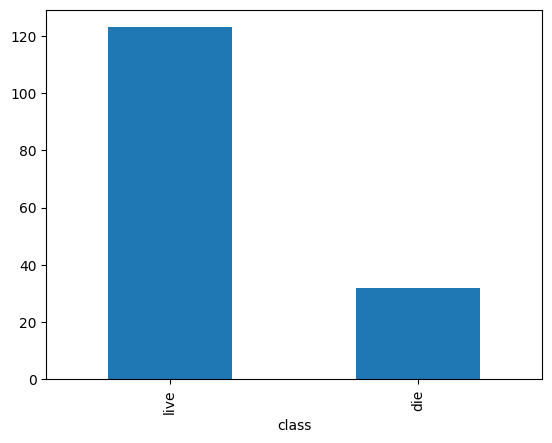

In [22]:
pd.value_counts(df['class']).plot.bar()